<a href="https://colab.research.google.com/github/Pashokkkk/customer_conversion_predictor/blob/main/notebooks/Customer_Conversion_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Conversion Prediction**

# **Load the data**

In [1]:
import pandas as pd

# Load training and testing datasets
train_df = pd.read_csv('../data/training_sample.csv')
# Quick check
print("Training shape:", train_df.shape)

# Preview data
train_df.head()

Training shape: (455401, 25)


,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,a720-6b732349-a720-4862-bd21-644732,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,a0c0-6b73247c-a0c0-4bd9-8baa-797356,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,86a8-6b735c67-86a8-407b-ba24-333055,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,6a3d-6b736346-6a3d-4085-934b-396834,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
4,b74a-6b737717-b74a-45c3-8c6a-421140,0,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,1


Check if "Purchase" column exists in both

In [2]:
print(train_df.columns)

Index(['UserID', 'basket_icon_click', 'basket_add_list', 'basket_add_detail',
       'sort_by', 'image_picker', 'account_page_click', 'promo_banner_click',
       'detail_wishlist_add', 'list_size_dropdown', 'closed_minibasket_click',
       'checked_delivery_detail', 'checked_returns_detail', 'sign_in',
       'saw_checkout', 'saw_sizecharts', 'saw_delivery', 'saw_account_upgrade',
       'saw_homepage', 'device_mobile', 'device_computer', 'device_tablet',
       'returning_user', 'loc_uk', 'ordered'],
      dtype='object')


## **Basic data cleaning**

In [3]:
print(train_df.isnull().sum())

# Check datatypes
print(train_df.dtypes)

# Handle missing data if necessary (for example)
# train_df = train_df.dropna()
# or fill missing values
# train_df.fillna(0, inplace=True)


UserID                     0
basket_icon_click          0
basket_add_list            0
basket_add_detail          0
sort_by                    0
image_picker               0
account_page_click         0
promo_banner_click         0
detail_wishlist_add        0
list_size_dropdown         0
closed_minibasket_click    0
checked_delivery_detail    0
checked_returns_detail     0
sign_in                    0
saw_checkout               0
saw_sizecharts             0
saw_delivery               0
saw_account_upgrade        0
saw_homepage               0
device_mobile              0
device_computer            0
device_tablet              0
returning_user             0
loc_uk                     0
ordered                    0
dtype: int64
UserID                     object
basket_icon_click           int64
basket_add_list             int64
basket_add_detail           int64
sort_by                     int64
image_picker                int64
account_page_click          int64
promo_banner_click      

In [4]:
# Drop UserID
train_df = train_df.drop('UserID', axis=1)

# Separate features (X) and target (y)
X = train_df.drop('ordered', axis=1)
y = train_df['ordered']

## **Exploratory Data Analysis (EDA)**

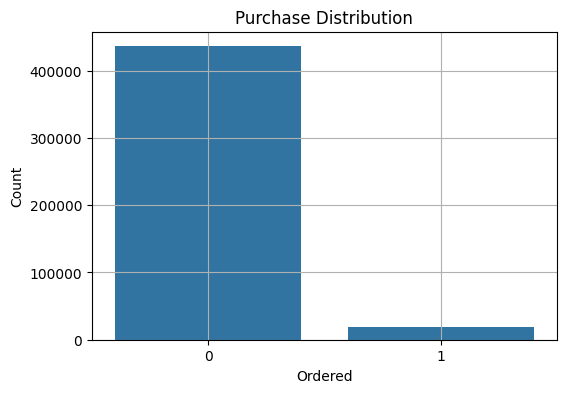

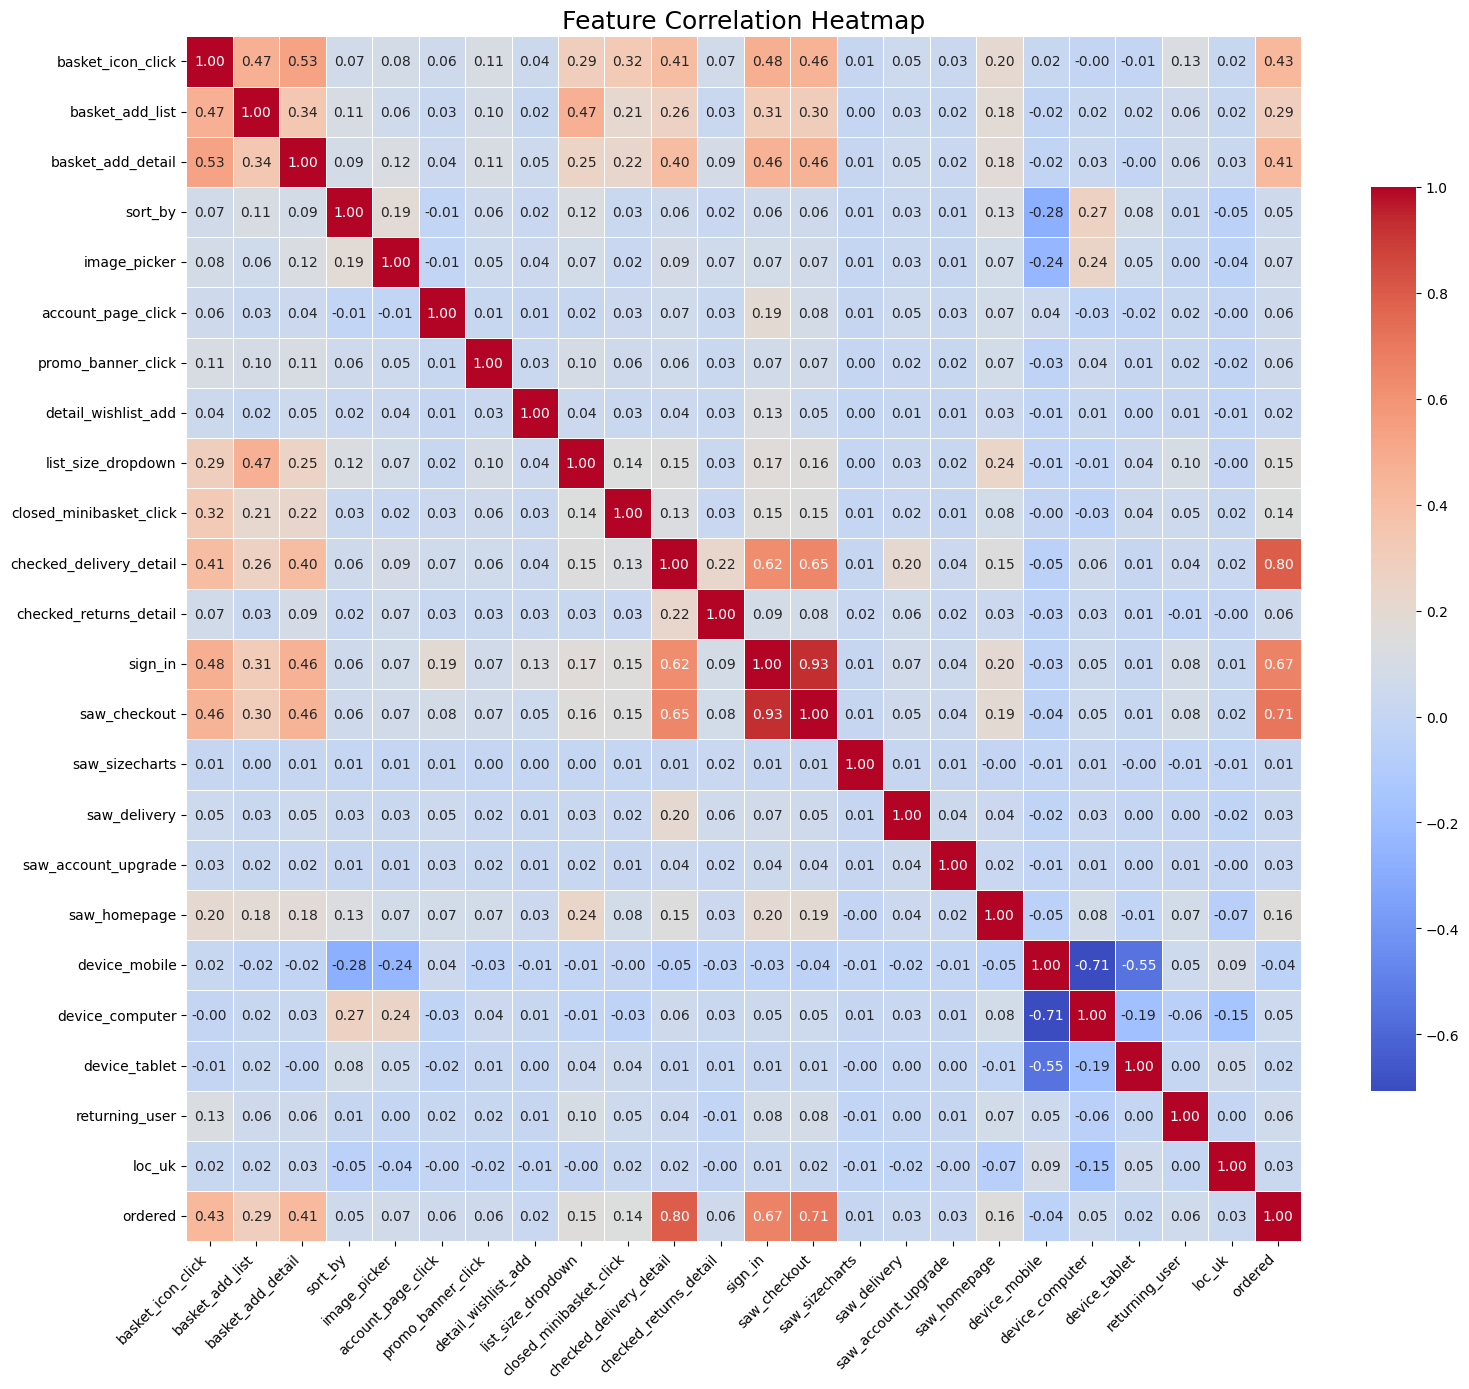

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Plot purchase distribution
plt.figure(figsize=(6,4))
sns.countplot(x='ordered', data=train_df)
plt.title('Purchase Distribution')
plt.xlabel('Ordered')
plt.ylabel('Count')
plt.grid(True)

# Save the figure
plt.savefig("../plots/purchase_distribution.png")
plt.show()

# 2. Plot correlation heatmap (fixed version)
plt.figure(figsize=(16, 14))  # Slightly bigger figure
heatmap = sns.heatmap(train_df.corr(),
                      annot=True,
                      cmap='coolwarm',
                      fmt=".2f",
                      linewidths=0.5,
                      cbar_kws={"shrink": 0.75})

plt.title('Feature Correlation Heatmap', fontsize=18)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels nicely
plt.yticks(rotation=0)               # Keep y-axis labels horizontal
plt.tight_layout()                   # Prevent cut-off labels
# Save the figure
plt.savefig("../plots/feature_correlation_heatmap.png")
plt.show()


## **Logistic Regression + Evaluation (full pipeline)**

Accuracy: 0.9921315171166951
Precision: 0.8465663637717861
Recall: 0.9921438547486033
F1 Score: 0.9135921549714653
ROC AUC: 0.9974257080882774

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    130893
           1       0.85      0.99      0.91      5728

    accuracy                           0.99    136621
   macro avg       0.92      0.99      0.95    136621
weighted avg       0.99      0.99      0.99    136621



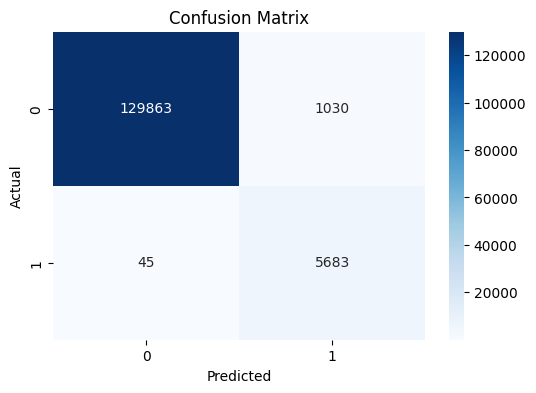

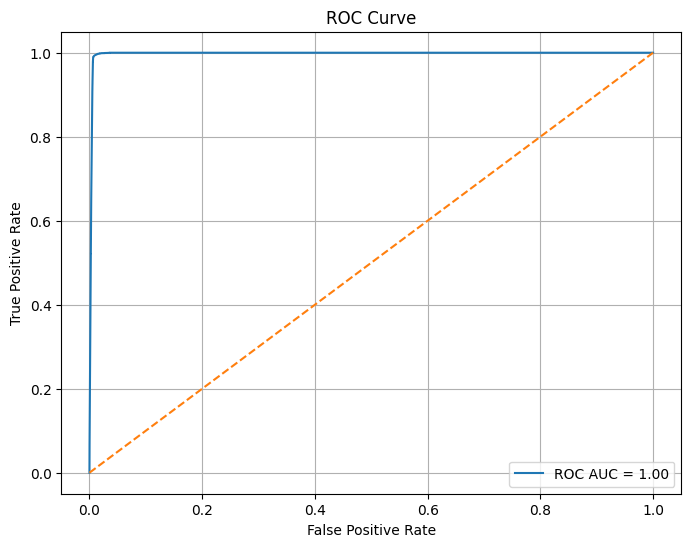

In [6]:
# 1. Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Manual train/test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Train Logistic Regression with class balancing
model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# 4. Predict
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability for ROC AUC

# 5. Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 6. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
# Save the figure
plt.savefig("../plots/confusion_matrix.png")
plt.show()

# 7. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc_score(y_test, y_pred_proba):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
# Save the figure
plt.savefig("../plots/roc_curve.png")
plt.show()


## **Feature Scaling (StandardScaler)**

In [7]:
# 1. Import StandardScaler
from sklearn.preprocessing import StandardScaler

# 2. Initialize scaler
scaler = StandardScaler()

# 3. Fit on training data, transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## **Retrain Logistic Regression (using scaled features)**

In [8]:
# Train Logistic Regression again (on scaled data)
model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:,1]

# Evaluate (same code as before)


## **Train Random Forest Classifier (New model)**

In [9]:
# 1. Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# 2. Train Random Forest (on unscaled features — trees don't need scaling!)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# 3. Predict
rf_y_pred = rf_model.predict(X_test)
rf_y_pred_proba = rf_model.predict_proba(X_test)[:,1]

# 4. Evaluate
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, rf_y_pred))
print("Precision:", precision_score(y_test, rf_y_pred))
print("Recall:", recall_score(y_test, rf_y_pred))
print("F1 Score:", f1_score(y_test, rf_y_pred))
print("ROC AUC:", roc_auc_score(y_test, rf_y_pred_proba))

print("\nClassification Report:")
print(classification_report(y_test, rf_y_pred))


Random Forest Results:
Accuracy: 0.9919704876995484
Precision: 0.8504616316028455
Recall: 0.9809706703910615
F1 Score: 0.9110660721524119
ROC AUC: 0.9956463490777383

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    130893
           1       0.85      0.98      0.91      5728

    accuracy                           0.99    136621
   macro avg       0.92      0.99      0.95    136621
weighted avg       0.99      0.99      0.99    136621



## **Confusion Matrix (for both models)**

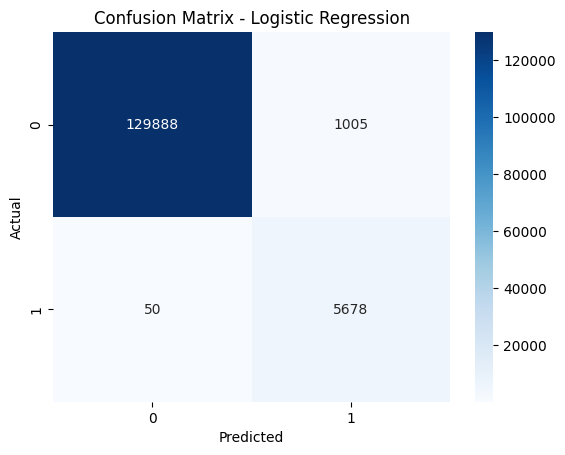

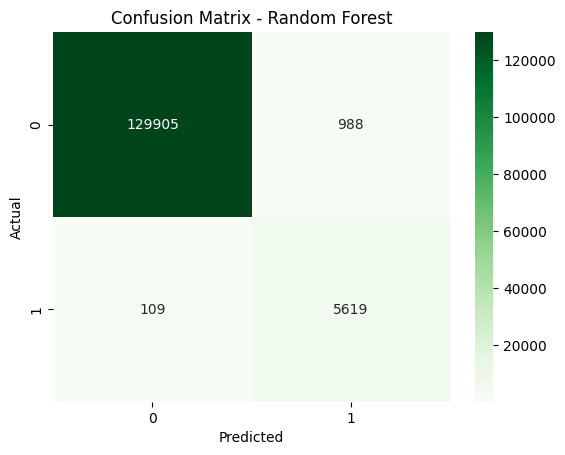

In [10]:
# Logistic Regression
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
# Save the figure
plt.savefig("../plots/logistic_regression.png")
plt.show()

# Random Forest
cm_rf = confusion_matrix(y_test, rf_y_pred)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
# Save the figure
plt.savefig("../plots/random_forest.png")
plt.show()


## **ROC Curve (for both models)**

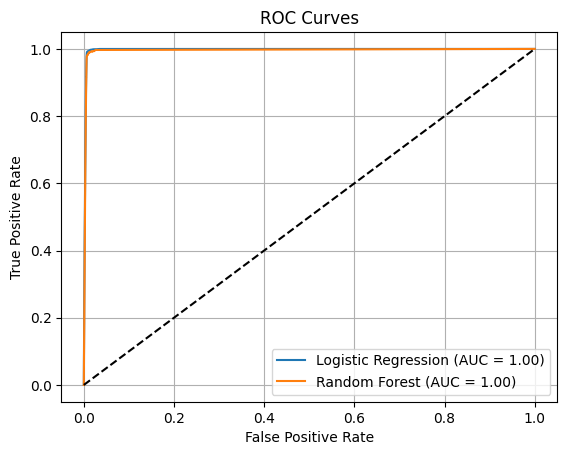

In [11]:
from sklearn.metrics import roc_curve, roc_auc_score

# Logistic Regression
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})")

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_y_pred_proba)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_score(y_test, rf_y_pred_proba):.2f})")

# Diagonal line
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True)
# Save the figure
plt.savefig("../plots/roc_curves.png")
plt.show()


## **Feature Importance (Random Forest)**

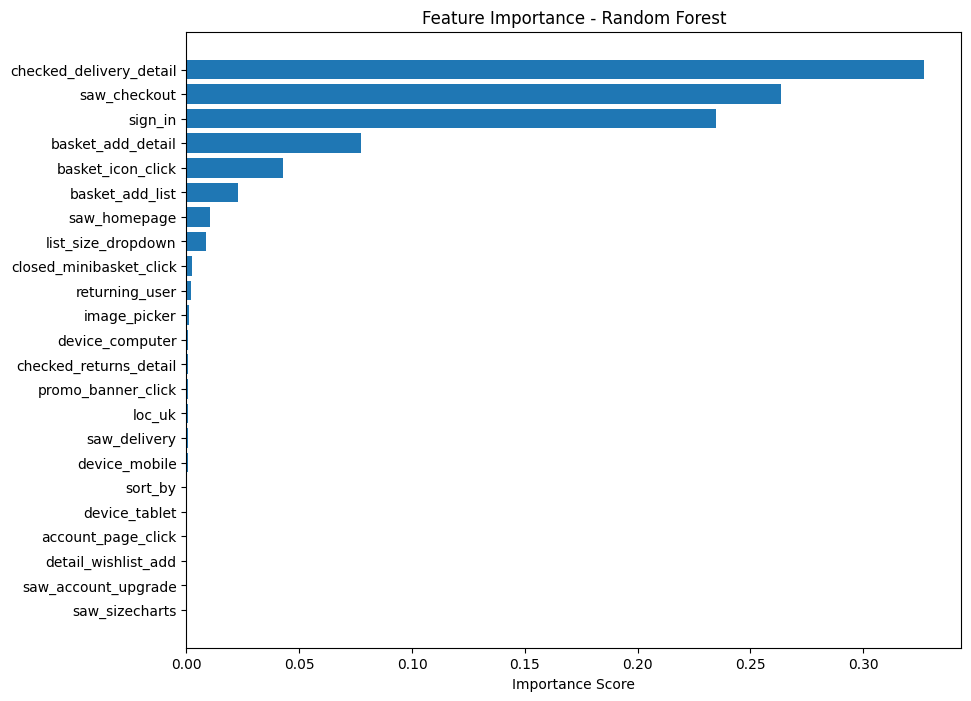

In [12]:
# Feature importance from Random Forest
importances = rf_model.feature_importances_
feature_names = X.columns

# Sort by importance
sorted_idx = importances.argsort()

plt.figure(figsize=(10,8))
plt.barh(feature_names[sorted_idx], importances[sorted_idx])
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
# Save the figure
plt.savefig("../plots/importance_score.png")
plt.show()


## **Comparison Table**

In [13]:
import pandas as pd

# Collect metrics
metrics = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"],
    "Logistic Regression": [
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        roc_auc_score(y_test, y_pred_proba)
    ],
    "Random Forest": [
        accuracy_score(y_test, rf_y_pred),
        precision_score(y_test, rf_y_pred),
        recall_score(y_test, rf_y_pred),
        f1_score(y_test, rf_y_pred),
        roc_auc_score(y_test, rf_y_pred_proba)
    ]
}

# Create dataframe
comparison_df = pd.DataFrame(metrics)

# Display table
print(comparison_df)


      Metric  Logistic Regression  Random Forest
0   Accuracy             0.992278       0.991970
1  Precision             0.849618       0.850462
2     Recall             0.991271       0.980971
3   F1 Score             0.914995       0.911066
4    ROC AUC             0.997438       0.995646


## **RandomizedSearchCV for Random Forest**

In [14]:
# 1. Import libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# 2. Define parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],            # number of trees
    'max_depth': [5, 10, 20, 30, None],                   # maximum depth of trees
    'min_samples_split': [2, 5, 10],                      # min samples to split
    'min_samples_leaf': [1, 2, 4],                        # min samples at leaf
    'bootstrap': [True, False],                           # whether bootstrap samples are used
    'max_features': ['auto', 'sqrt', 'log2']               # number of features to consider
}

# 3. Initialize RandomForest
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# 4. Setup RandomizedSearchCV
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,                   # number of random combinations to try
    scoring='roc_auc',            # optimize for ROC AUC
    cv=3,                         # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1                     # use all CPUs
)

# 5. Fit search on training data
rf_random.fit(X_train, y_train)

# 6. Best model
best_rf_model = rf_random.best_estimator_

print("\nBest Parameters Found:")
print(rf_random.best_params_)


Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
33 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
33 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/


Best Parameters Found:
{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': True}


## **optimized Random Forest**

In [15]:
# Predict with optimized model
best_rf_y_pred = best_rf_model.predict(X_test)
best_rf_y_pred_proba = best_rf_model.predict_proba(X_test)[:,1]

# Evaluate
print("Optimized Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, best_rf_y_pred))
print("Precision:", precision_score(y_test, best_rf_y_pred))
print("Recall:", recall_score(y_test, best_rf_y_pred))
print("F1 Score:", f1_score(y_test, best_rf_y_pred))
print("ROC AUC:", roc_auc_score(y_test, best_rf_y_pred_proba))

print("\nClassification Report:")
print(classification_report(y_test, best_rf_y_pred))


Optimized Random Forest Results:
Accuracy: 0.9924389369130661
Precision: 0.8525304099714672
Recall: 0.9910963687150838
F1 Score: 0.9166061193186406
ROC AUC: 0.9974364902756301

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    130893
           1       0.85      0.99      0.92      5728

    accuracy                           0.99    136621
   macro avg       0.93      0.99      0.96    136621
weighted avg       0.99      0.99      0.99    136621



## **Saving the model**

In [18]:
import joblib

# Save the optimized Random Forest model
joblib.dump(best_rf_model, '../models/best_random_forest_model.pkl')

print("Model saved successfully!")


Model saved successfully!


In [19]:
# Load the model
best_rf_model = joblib.load('../models/best_random_forest_model.pkl')

# Predict again
predictions = best_rf_model.predict(X_test)


## **Mini App (inside Notebook)**

In [22]:
# 1. Imports
import ipywidgets as widgets
from IPython.display import display
import joblib
import numpy as np

# 2. Load your trained model
model = joblib.load('../models/best_random_forest_model.pkl')

# 3. Define all feature names (must match the training order exactly)
feature_names = [
    'basket_icon_click', 'basket_add_list', 'basket_add_detail', 'sort_by', 'image_picker',
    'account_page_click', 'promo_banner_click', 'detail_wishlist_add', 'list_size_dropdown',
    'closed_minibasket_click', 'checked_delivery_detail', 'checked_returns_detail', 'sign_in',
    'saw_checkout', 'saw_sizecharts', 'saw_delivery', 'saw_account_upgrade', 'saw_homepage',
    'device_mobile', 'device_computer', 'device_tablet', 'returning_user', 'loc_uk'
]

# 4. Create a checkbox for each feature dynamically
checkboxes = {}
for feature in feature_names:
    checkboxes[feature] = widgets.Checkbox(description=feature.replace('_', ' ').capitalize())

# 5. Prediction button and output area
predict_button = widgets.Button(description="Predict Purchase", button_style='success')
output = widgets.Output()

# 6. Prediction function
def predict_action(b):
    user_input = np.array([int(checkboxes[feature].value) for feature in feature_names]).reshape(1, -1)

    prediction = model.predict(user_input)

    with output:
        output.clear_output()
        if prediction[0] == 1:
            print("✅ Prediction: Customer Will Purchase!")
        else:
            print("❌ Prediction: Customer Will Not Purchase.")

# 7. Connect button
predict_button.on_click(predict_action)

# 8. Display all
form = widgets.VBox(
    list(checkboxes.values()) + [predict_button, output]
)

display(form)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local